# Preparing Data (Importing libraries and data, normalizing data, splitting data (into X and y, and into train and test))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mike-ds30/quiz/main/mark.csv')
data.head(1000)

,test1,test2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


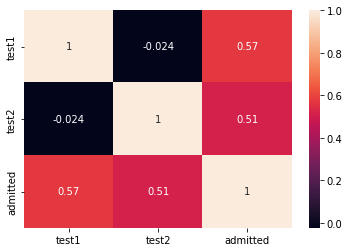

In [ ]:
sns.heatmap(data.corr(), annot = True)

In [ ]:
X = data.drop('admitted', axis = 1)
y = data['admitted']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

# Naive Bayes Classifier

In [ ]:
class naive_bayes:
  def fit(self, X, y):
    data_cnt, data_vars = X.shape
    self._classes = np.unique(y)
    category_cnt = len(self._classes)
    self._mean = np.zeros((category_cnt, data_vars), dtype = np.float64)
    self._variance = np.zeros((category_cnt, data_vars), dtype = np.float64)
    self._priors = np.zeros((category_cnt), dtype = np.float64)
    for c in self._classes:
      X_c = X[c == y]
      self._mean[c, :] = X_c.mean(axis = 0)
      self._variance[c, :] = X_c.var(axis = 0)
      self._priors[c] = X_c.shape[0] / float(data_cnt)

  def predict(self, X):
    y_pred = [self._predict_each(x) for x in X]
    return y_pred

  def _predict_each(self, x):
    posteriors = []
    for idx, c in enumerate(self._classes):
      prior = np.log(self._priors[idx])
      cls_cond = np.sum(np.log(self._probability_distribution(idx, x)))
      posterior = prior + cls_cond
      posteriors.append(posterior)
    return self._classes[np.argmax(posteriors)]
    
  def _probability_distribution(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._variance[class_idx]
    num = np.exp(- (x - mean) ** 2 / (2 * var))
    den = np.sqrt(2 * np.pi * var)
    return num / den

# Training

In [ ]:
model = naive_bayes()
model.fit(X_train, y_train)

# Validation

In [ ]:
X_test_pred = np.array(X_test)
y_pred = model.predict(X_test_pred)
print(y_pred)
print(np.array(y_test))

[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0]


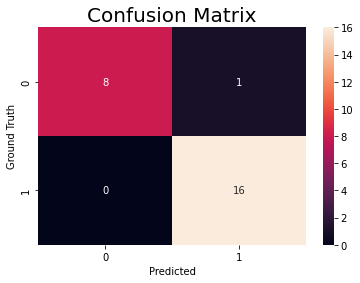

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix", fontsize=20)
plt.show()